In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from collections import Counter

# Download required NLTK data
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set up plotting style
plt.style.use('seaborn-v0_8')
%matplotlib inline

installed


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load the dataset from local data folder
df = pd.read_csv('../data/newsData/raw_analyst_ratings.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1407328, 6)

First 5 rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
# Basic information about the dataset
print("=== DATASET INFO ===")
df.info()

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== COLUMN NAMES ===")
print(df.columns.tolist())

print("\n=== DATASET SIZE ===")
print(f"Total articles: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB

=== MISSING VALUES ===
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

=== COLUMN NAMES ===
['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

=== DATASET SIZE ===
Total articles: 1,407,328
Memory usage: 634.55 MB


In [9]:
# First, let's examine the date column more carefully
print("=== DATE COLUMN ANALYSIS ===")
print("First 10 date values:")
print(df['date'].head(10).tolist())

print("\nUnique date formats sample:")
sample_dates = df['date'].dropna().unique()[:10]
for i, date_val in enumerate(sample_dates):
    print(f"{i+1}. {date_val} (type: {type(date_val)})")

print(f"\nDate column dtype: {df['date'].dtype}")

=== DATE COLUMN ANALYSIS ===
First 10 date values:
[Timestamp('2020-06-05 14:30:54+0000', tz='UTC'), Timestamp('2020-06-03 14:45:20+0000', tz='UTC'), Timestamp('2020-05-26 08:30:07+0000', tz='UTC'), Timestamp('2020-05-22 16:45:06+0000', tz='UTC'), Timestamp('2020-05-22 15:38:59+0000', tz='UTC'), Timestamp('2020-05-22 15:23:25+0000', tz='UTC'), Timestamp('2020-05-22 13:36:20+0000', tz='UTC'), Timestamp('2020-05-22 13:07:04+0000', tz='UTC'), Timestamp('2020-05-22 12:37:59+0000', tz='UTC'), Timestamp('2020-05-22 12:06:17+0000', tz='UTC')]

Unique date formats sample:
1. 2020-06-05 14:30:54+00:00 (type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>)
2. 2020-06-03 14:45:20+00:00 (type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>)
3. 2020-05-26 08:30:07+00:00 (type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>)
4. 2020-05-22 16:45:06+00:00 (type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>)
5. 2020-05-22 15:38:59+00:00 (type: <class 'pandas._libs.tslibs.timestamps.Ti

=== HEADLINE LENGTH STATISTICS ===
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


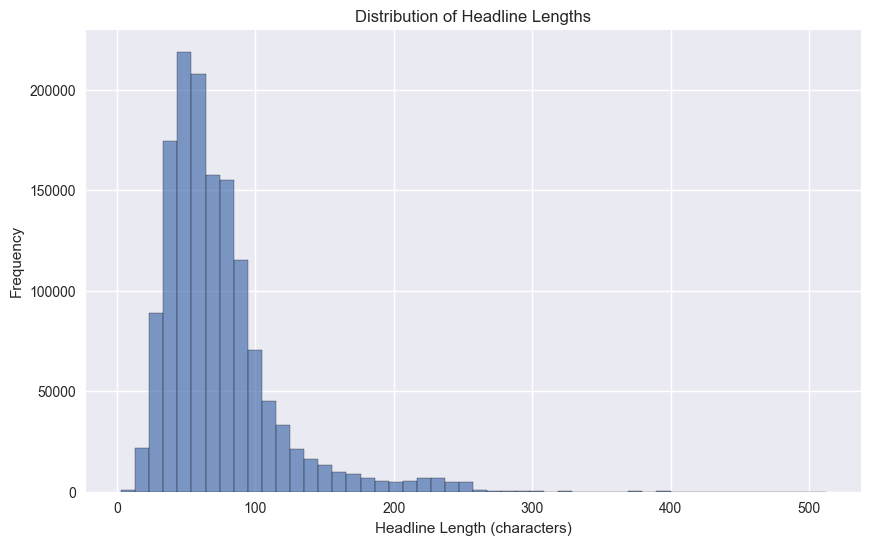

In [10]:
# Basic descriptive statistics for headline length
df['headline_length'] = df['headline'].str.len()
print("=== HEADLINE LENGTH STATISTICS ===")
print(df['headline_length'].describe())

# Plot headline length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['headline_length'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

=== TOP 10 PUBLISHERS ===
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


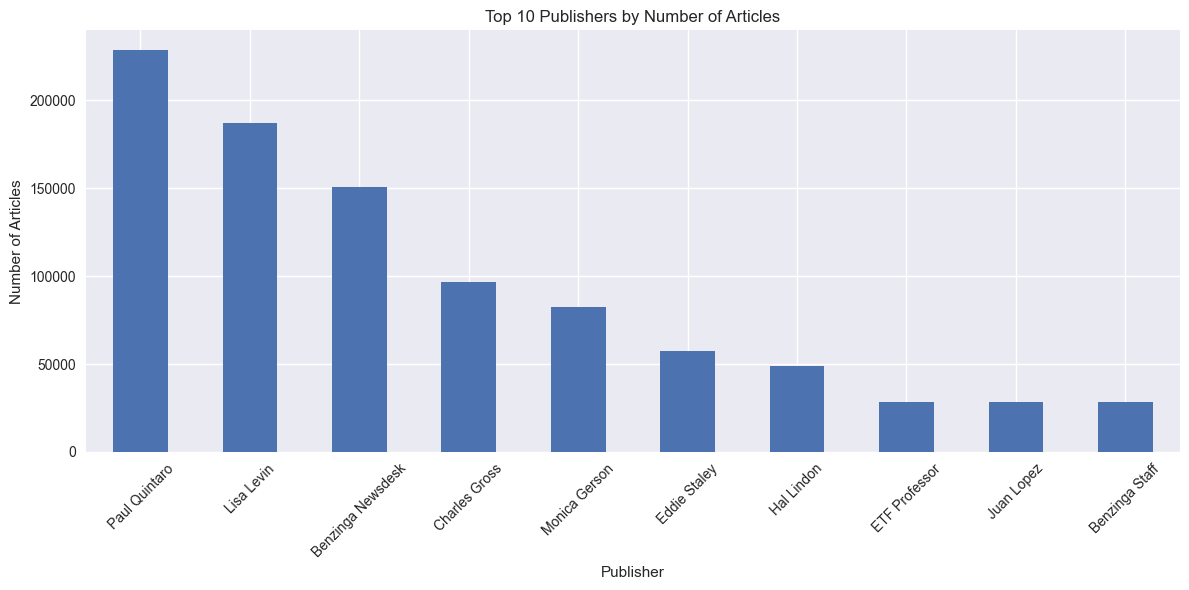

In [11]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

print("=== TOP 10 PUBLISHERS ===")
print(publisher_counts.head(10))

# Plot top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

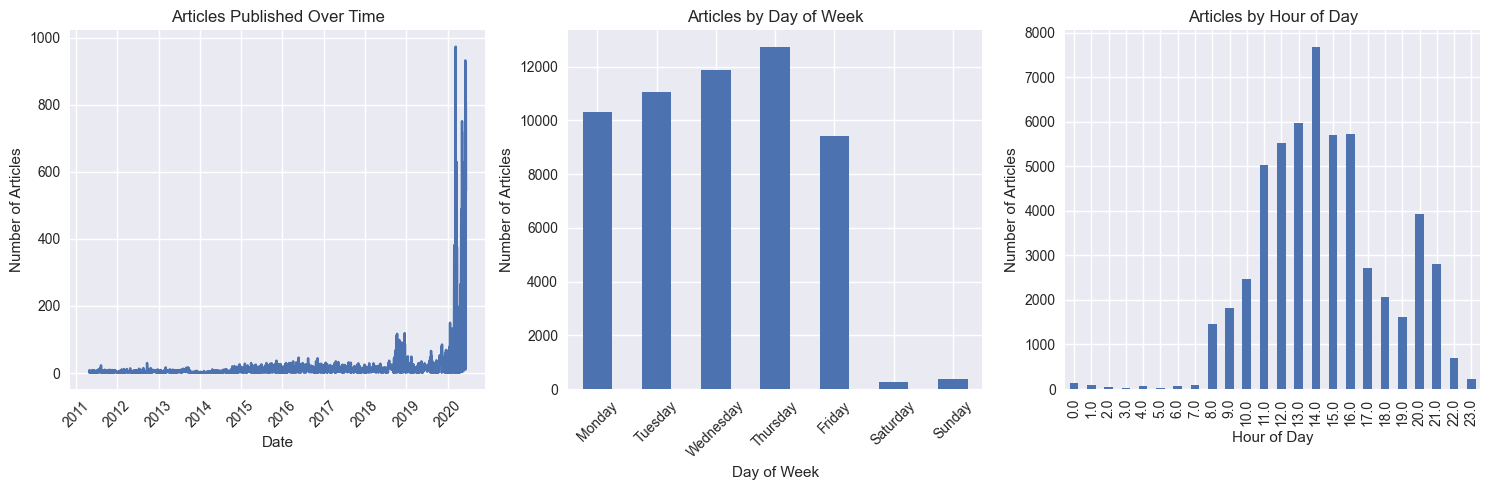

In [12]:
# Extract date components for analysis
df['date_only'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Articles over time
daily_articles = df['date_only'].value_counts().sort_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
daily_articles.plot(title='Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Articles by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

=== MOST COMMON WORDS IN HEADLINES ===
stocks: 159102
eps: 127403
shares: 112655
reports: 108429
market: 89225
earnings: 80855
top: 78354
sales: 77924
announces: 66513
price: 63328
downgrades: 61862
trading: 60582
raises: 57735
target: 53530
maintains: 52958
est: 49316
new: 47662
buy: 43697
session: 43513
says: 42839


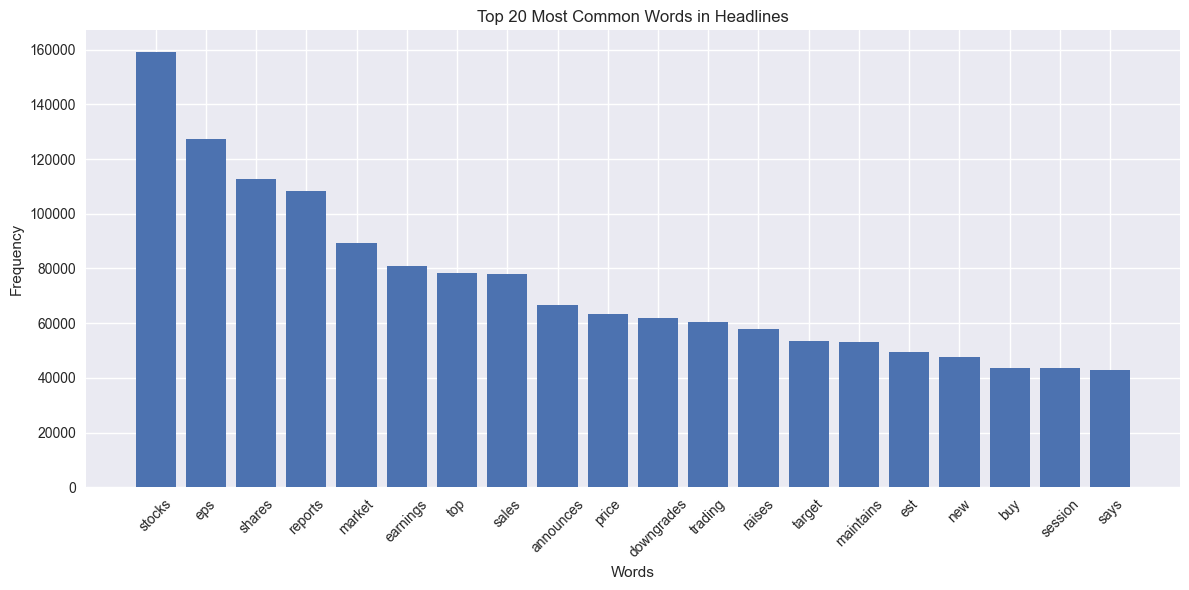

In [13]:
# Text analysis - most common words
stop_words = set(stopwords.words('english'))

def extract_common_words(text_series, n=20):
    all_words = ' '.join(text_series.astype(str)).lower().split()
    # Filter out stopwords and non-alphabetic words
    filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words and len(word) > 2]
    word_freq = Counter(filtered_words)
    return word_freq.most_common(n)

common_words = extract_common_words(df['headline'])
print("=== MOST COMMON WORDS IN HEADLINES ===")
for word, count in common_words:
    print(f"{word}: {count}")

# Plot common words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words in Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== TOP 10 STOCK SYMBOLS ===
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64


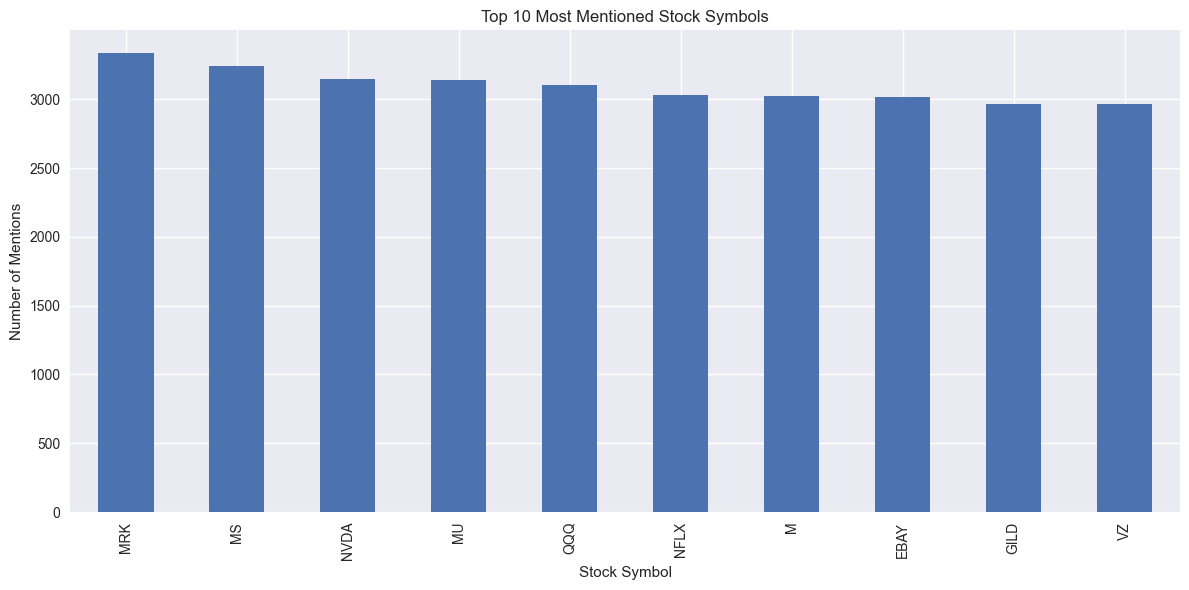

In [14]:
# Analyze stock symbols mentioned
stock_counts = df['stock'].value_counts()

print("=== TOP 10 STOCK SYMBOLS ===")
print(stock_counts.head(10))

# Plot top stock symbols
plt.figure(figsize=(12, 6))
stock_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Mentioned Stock Symbols')
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.show()

In [15]:
# Check for duplicates and data quality
print("=== DATA QUALITY CHECKS ===")
print(f"Duplicate headlines: {df.duplicated(subset=['headline']).sum()}")
print(f"Null headlines: {df['headline'].isnull().sum()}")
print(f"Null stock symbols: {df['stock'].isnull().sum()}")

# Sample some headlines for manual review
print("\n=== SAMPLE HEADLINES ===")
for i, headline in enumerate(df['headline'].head(10).values):
    print(f"{i+1}. {headline}")

=== DATA QUALITY CHECKS ===
Duplicate headlines: 561558
Null headlines: 0
Null stock symbols: 0

=== SAMPLE HEADLINES ===
1. Stocks That Hit 52-Week Highs On Friday
2. Stocks That Hit 52-Week Highs On Wednesday
3. 71 Biggest Movers From Friday
4. 46 Stocks Moving In Friday's Mid-Day Session
5. B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
6. CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85
7. UBS Maintains Neutral on Agilent Technologies, Raises Price Target to $87
8. Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.
9. Wells Fargo Maintains Overweight on Agilent Technologies, Raises Price Target to $95
10. 10 Biggest Price Target Changes For Friday
